In [1]:
from sklearn.datasets import fetch_california_housing

data = fetch_california_housing(as_frame=True)
df = data.frame

df.head()


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [5]:
X = df.drop("MedHouseVal", axis=1)
y = df["MedHouseVal"]

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [7]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [8]:
from sklearn.metrics import mean_squared_error, r2_score

y_pred = model.predict(X_test)

print("MSE:", mean_squared_error(y_test, y_pred))
print("R2:", r2_score(y_test, y_pred))
print("Coefs:", model.coef_)
print("Intercept:", model.intercept_)


MSE: 0.5558915986952442
R2: 0.575787706032451
Coefs: [ 4.48674910e-01  9.72425752e-03 -1.23323343e-01  7.83144907e-01
 -2.02962058e-06 -3.52631849e-03 -4.19792487e-01 -4.33708065e-01]
Intercept: -37.0232777060641


In [9]:
model.coef_



array([ 4.48674910e-01,  9.72425752e-03, -1.23323343e-01,  7.83144907e-01,
       -2.02962058e-06, -3.52631849e-03, -4.19792487e-01, -4.33708065e-01])

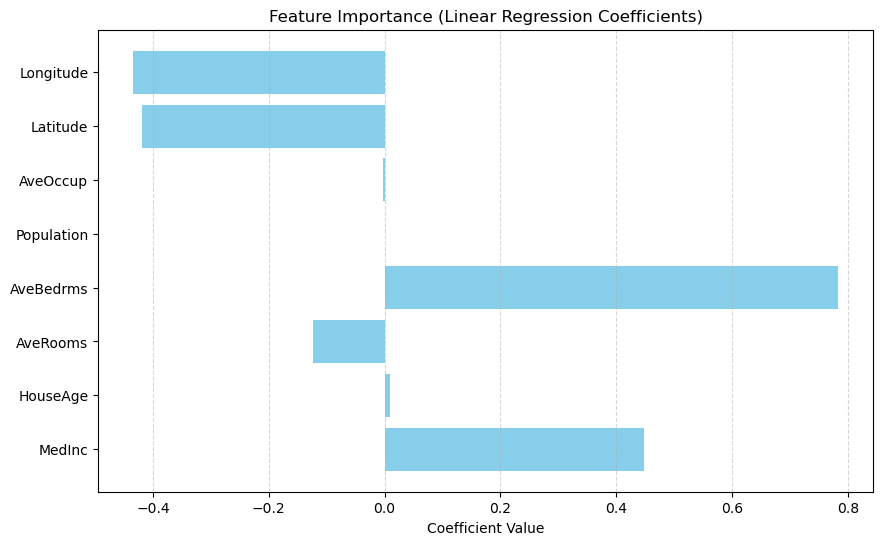

In [10]:
import matplotlib.pyplot as plt
import numpy as np

# نام ویژگی‌ها
feature_names = X.columns

# وزن‌ها
coefs = model.coef_

# رسم نمودار
plt.figure(figsize=(10, 6))
plt.barh(feature_names, coefs, color='skyblue')
plt.xlabel("Coefficient Value")
plt.title("Feature Importance (Linear Regression Coefficients)")
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.show()


In [11]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [14]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


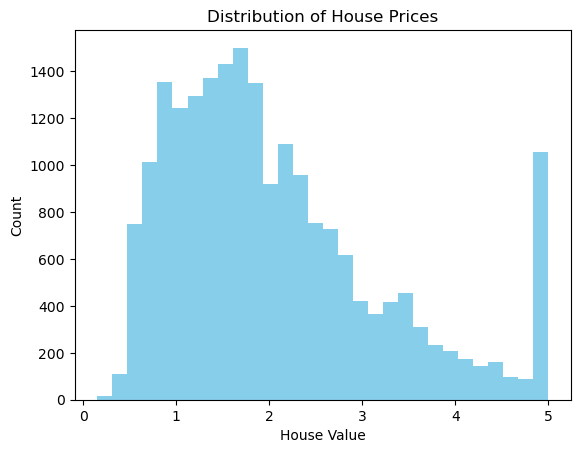

In [15]:
import matplotlib.pyplot as plt

plt.hist(df["MedHouseVal"], bins=30, color='skyblue')
plt.xlabel("House Value")
plt.ylabel("Count")
plt.title("Distribution of House Prices")
plt.show()


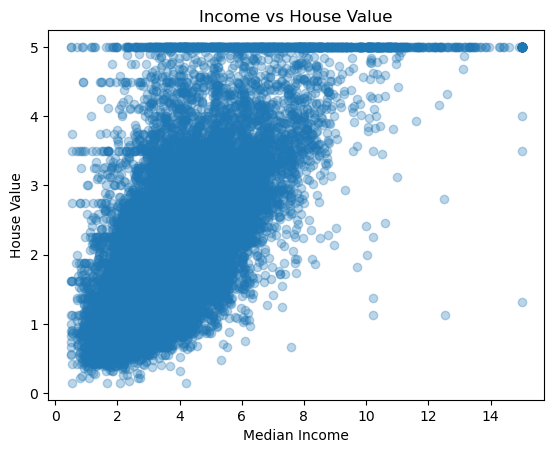

In [16]:
plt.scatter(df["MedInc"], df["MedHouseVal"], alpha=0.3)
plt.xlabel("Median Income")
plt.ylabel("House Value")
plt.title("Income vs House Value")
plt.show()


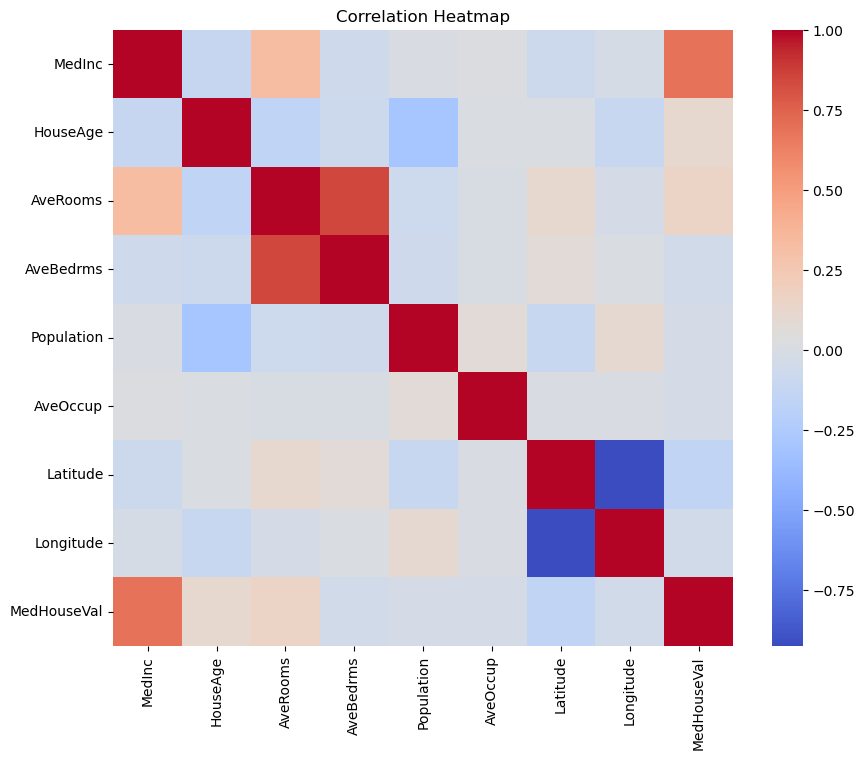

In [17]:
import seaborn as sns
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=False, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


In [18]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [19]:
model_scaled = LinearRegression()
model_scaled.fit(X_train_scaled, y_train)

y_pred_scaled = model_scaled.predict(X_test_scaled)

print("MSE (scaled):", mean_squared_error(y_test, y_pred_scaled))
print("R2 (scaled):", r2_score(y_test, y_pred_scaled))


MSE (scaled): 0.555891598695244
R2 (scaled): 0.5757877060324511


In [20]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

model_poly = LinearRegression()
model_poly.fit(X_train_poly, y_train)

y_pred_poly = model_poly.predict(X_test_poly)

print("MSE (poly):", mean_squared_error(y_test, y_pred_poly))
print("R2 (poly):", r2_score(y_test, y_pred_poly))


MSE (poly): 0.4643015238301213
R2 (poly): 0.6456819729261911


In [21]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

rf = RandomForestRegressor(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

print("MSE (RandomForest):", mean_squared_error(y_test, y_pred_rf))
print("R2 (RandomForest):", r2_score(y_test, y_pred_rf))


MSE (RandomForest): 0.254197709216459
R2 (RandomForest): 0.8060165082524882


In [22]:
from sklearn.ensemble import GradientBoostingRegressor

gb = GradientBoostingRegressor(random_state=42)
gb.fit(X_train, y_train)

y_pred_gb = gb.predict(X_test)

print("MSE (GradientBoosting):", mean_squared_error(y_test, y_pred_gb))
print("R2 (GradientBoosting):", r2_score(y_test, y_pred_gb))


MSE (GradientBoosting): 0.2939973248643864
R2 (GradientBoosting): 0.7756446042829697


In [23]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

rf = RandomForestRegressor(random_state=42)

grid = GridSearchCV(rf, param_grid, cv=3, scoring='r2', n_jobs=-1)
grid.fit(X_train, y_train)

print("Best Params:", grid.best_params_)
print("Best Score:", grid.best_score_)


Best Params: {'max_depth': 30, 'min_samples_split': 2, 'n_estimators': 300}
Best Score: 0.802551230100465


In [24]:
best_rf = grid.best_estimator_
y_pred_best = best_rf.predict(X_test)

print("R2 (Best RandomForest):", r2_score(y_test, y_pred_best))


R2 (Best RandomForest): 0.8063661108149541


In [25]:
from sklearn.ensemble import GradientBoostingRegressor

param_grid_gb = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.05, 0.1, 0.2],
    'max_depth': [2, 3, 4]
}

gb = GradientBoostingRegressor(random_state=42)

grid_gb = GridSearchCV(gb, param_grid_gb, cv=3, scoring='r2', n_jobs=-1)
grid_gb.fit(X_train, y_train)

print("Best Params (GB):", grid_gb.best_params_)
print("Best Score (GB):", grid_gb.best_score_)


Best Params (GB): {'learning_rate': 0.2, 'max_depth': 4, 'n_estimators': 300}
Best Score (GB): 0.8277495233038978


In [26]:
import numpy as np


np.random.seed(42)

n = 2000  # تعداد نمونه‌ها

area = np.random.uniform(50, 200, n)        # متراژ
rooms = np.random.uniform(1, 6, n)          # تعداد اتاق
age = np.random.uniform(0, 40, n)           # سن ساختمان

X = np.column_stack([area, rooms, age])


In [27]:
true_w_area = 3000
true_w_rooms = 15000
true_w_age = -800
true_bias = 50000


In [28]:
noise = np.random.normal(0, 10000, n)

y = (true_w_area * area +
     true_w_rooms * rooms +
     true_w_age * age +
     true_bias +
     noise)


In [29]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X, y)

print("Learned Weights:", model.coef_)
print("Learned Bias:", model.intercept_)


Learned Weights: [ 2993.62721832 15221.40752285  -790.23401902]
Learned Bias: 49485.333716026216


In [30]:
from sklearn.ensemble import GradientBoostingRegressor

final_model = GradientBoostingRegressor(
    n_estimators=300,
    learning_rate=0.2,
    max_depth=4,
    random_state=42
)

final_model.fit(X_train, y_train)


GradientBoostingRegressor(learning_rate=0.2, max_depth=4, n_estimators=300,
                          random_state=42)

In [31]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', GradientBoostingRegressor(
        n_estimators=300,
        learning_rate=0.2,
        max_depth=4,
        random_state=42
    ))
])

pipeline.fit(X_train, y_train)


Pipeline(steps=[('scaler', StandardScaler()),
                ('model',
                 GradientBoostingRegressor(learning_rate=0.2, max_depth=4,
                                           n_estimators=300,
                                           random_state=42))])

In [32]:
import joblib

joblib.dump(pipeline, "house_price_model.pkl")


['house_price_model.pkl']

In [33]:
def predict_price(area, rooms, age, population, lat, lon, income):
    model = joblib.load("house_price_model.pkl")
    X_new = [[income, age, rooms, rooms/2, population, population/rooms, lat, lon]]
    return model.predict(X_new)[0]
